<a href="https://colab.research.google.com/github/RehamKhattab/Derma-Care-Project/blob/main/dermacare_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib

data_dir = pathlib.Path("/content/drive/MyDrive/model/data/train")

print(data_dir)

/content/drive/MyDrive/model/data/train


In [4]:
from glob import glob
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

6286


In [5]:
batch_size = 8
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

allData = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  image_size=(img_height, img_width))
print(len(allData))

Found 6286 files belonging to 2 classes.
Using 5029 files for training.
Found 6286 files belonging to 2 classes.
197


In [7]:
for image_batch, labels_batch in allData:
   print(image_batch.shape)
   print(labels_batch.shape)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3

In [8]:
class_names = train_ds.class_names
print(class_names)

aa = train_ds.take_while
print(aa)

['eczema', 'psoriasis']
<bound method DatasetV2.take_while of <BatchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>>


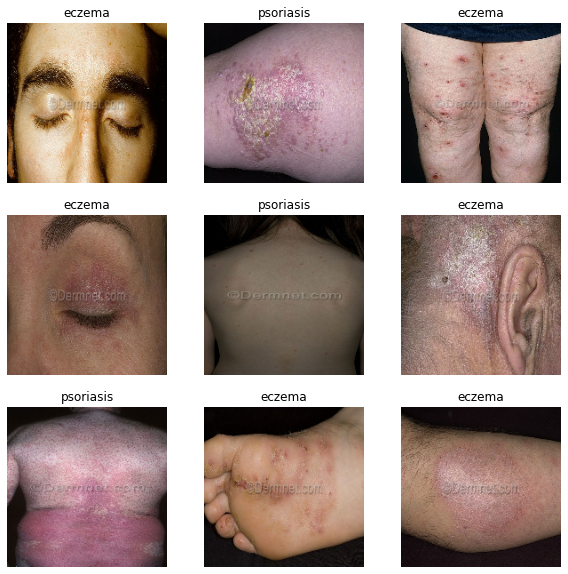

In [9]:
import matplotlib.pyplot as plt
imgesTotest=[]
plt.figure(figsize=(10, 10))
i=0
for images, labels in train_ds.take(9):
    ax = plt.subplot(3, 3, i+1)
    imgesTotest.append(images[0])
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(class_names[labels[0]])
    plt.axis("off")
    i+=1

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 180, 180, 3)
(8,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.97839326


In [14]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),

  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 45, 45, 64)       

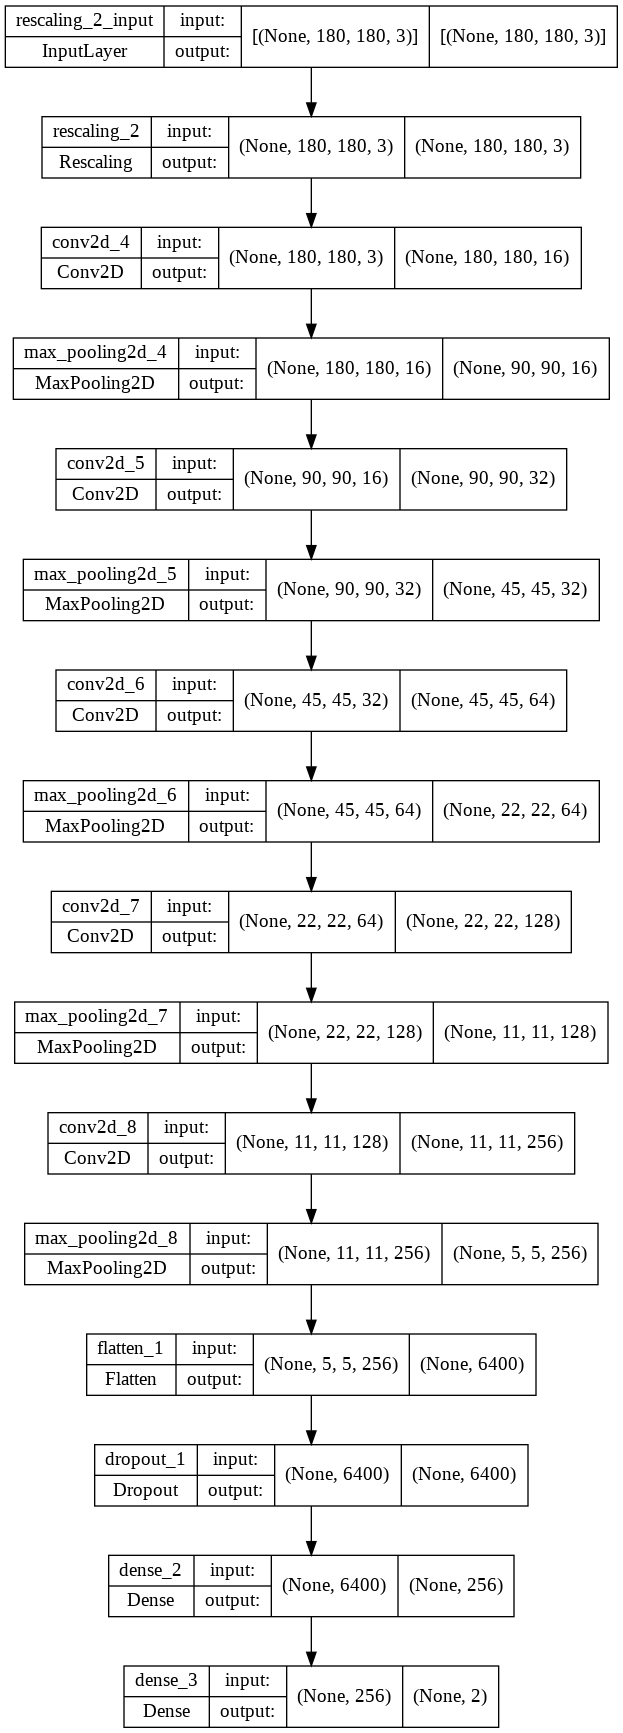

In [26]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from keract import get_activations
# imgs=train_ds.take(1)
img =imgesTotest[0]
img = img[np.newaxis,:,:]
x= [img]
img.shape
activations = get_activations(model, x, auto_compile=True)

rescaling_2_input (1, 180, 180, 3) 


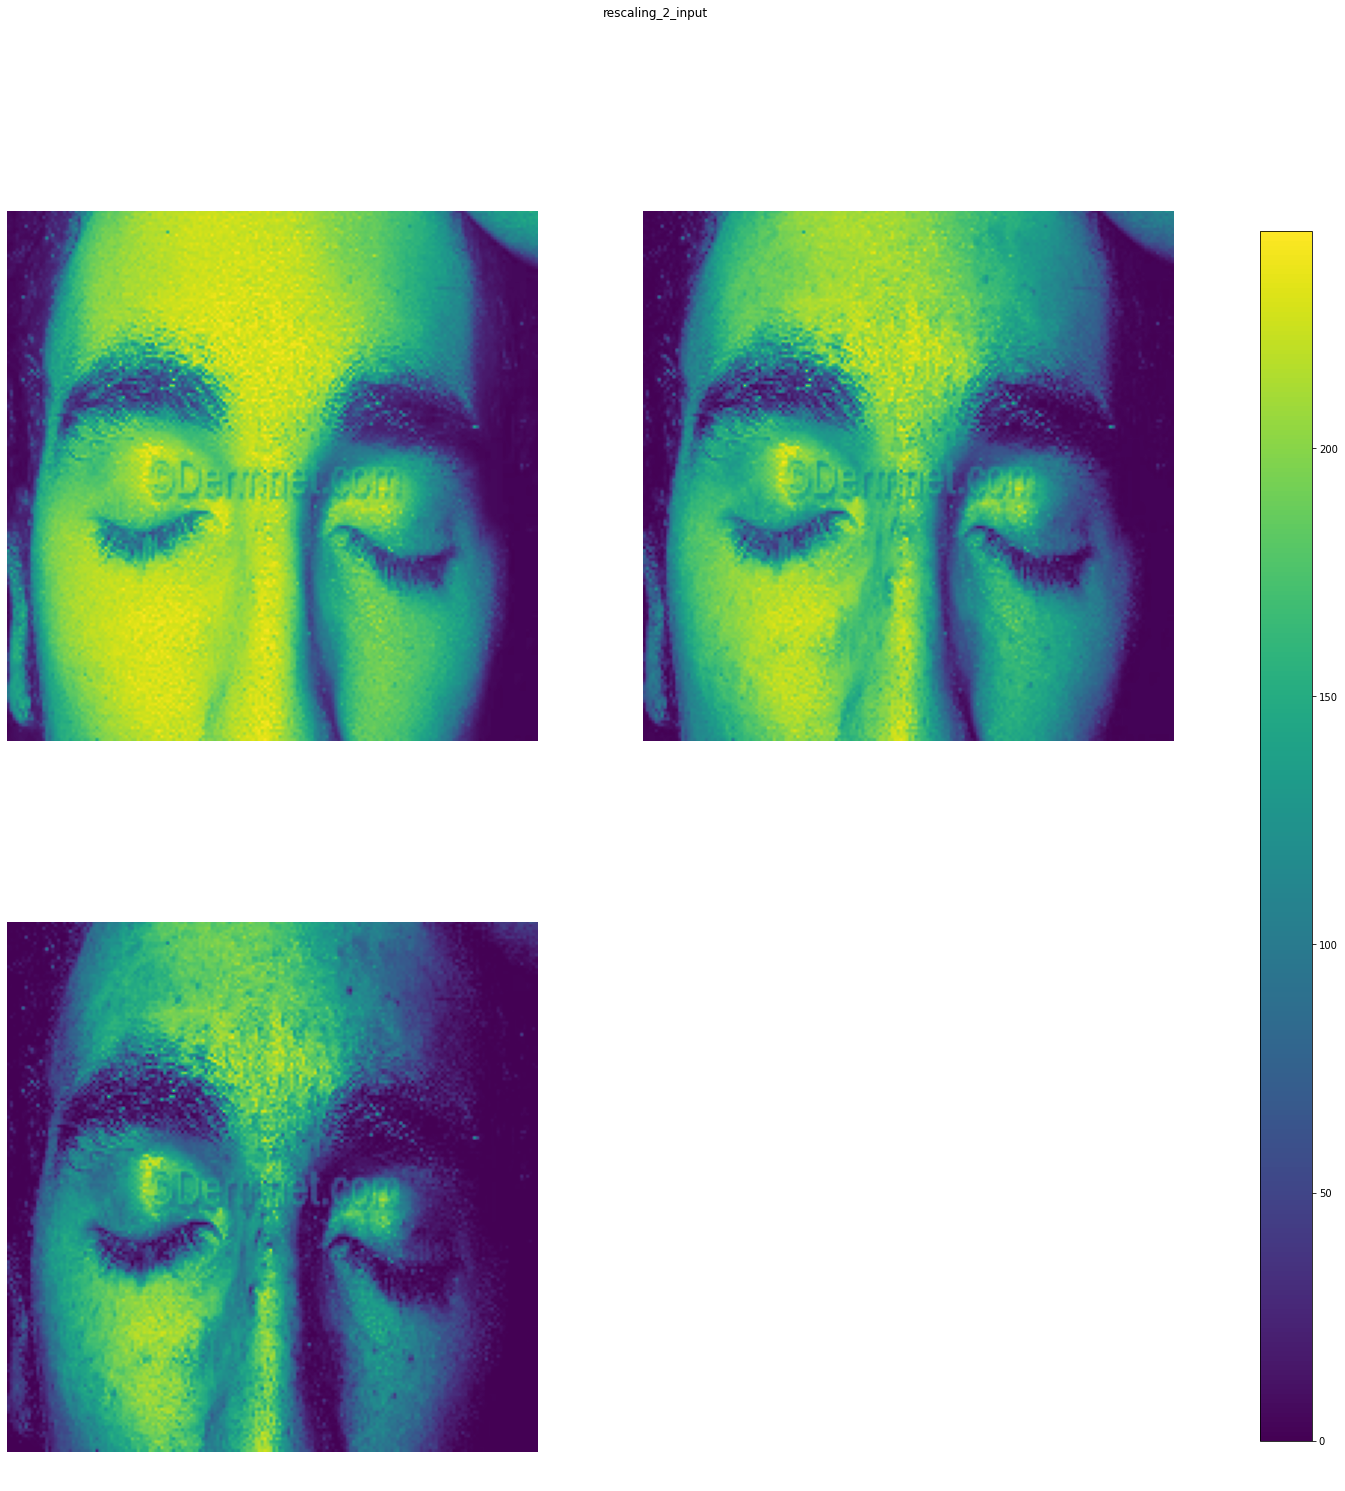

rescaling_2 (1, 180, 180, 3) 


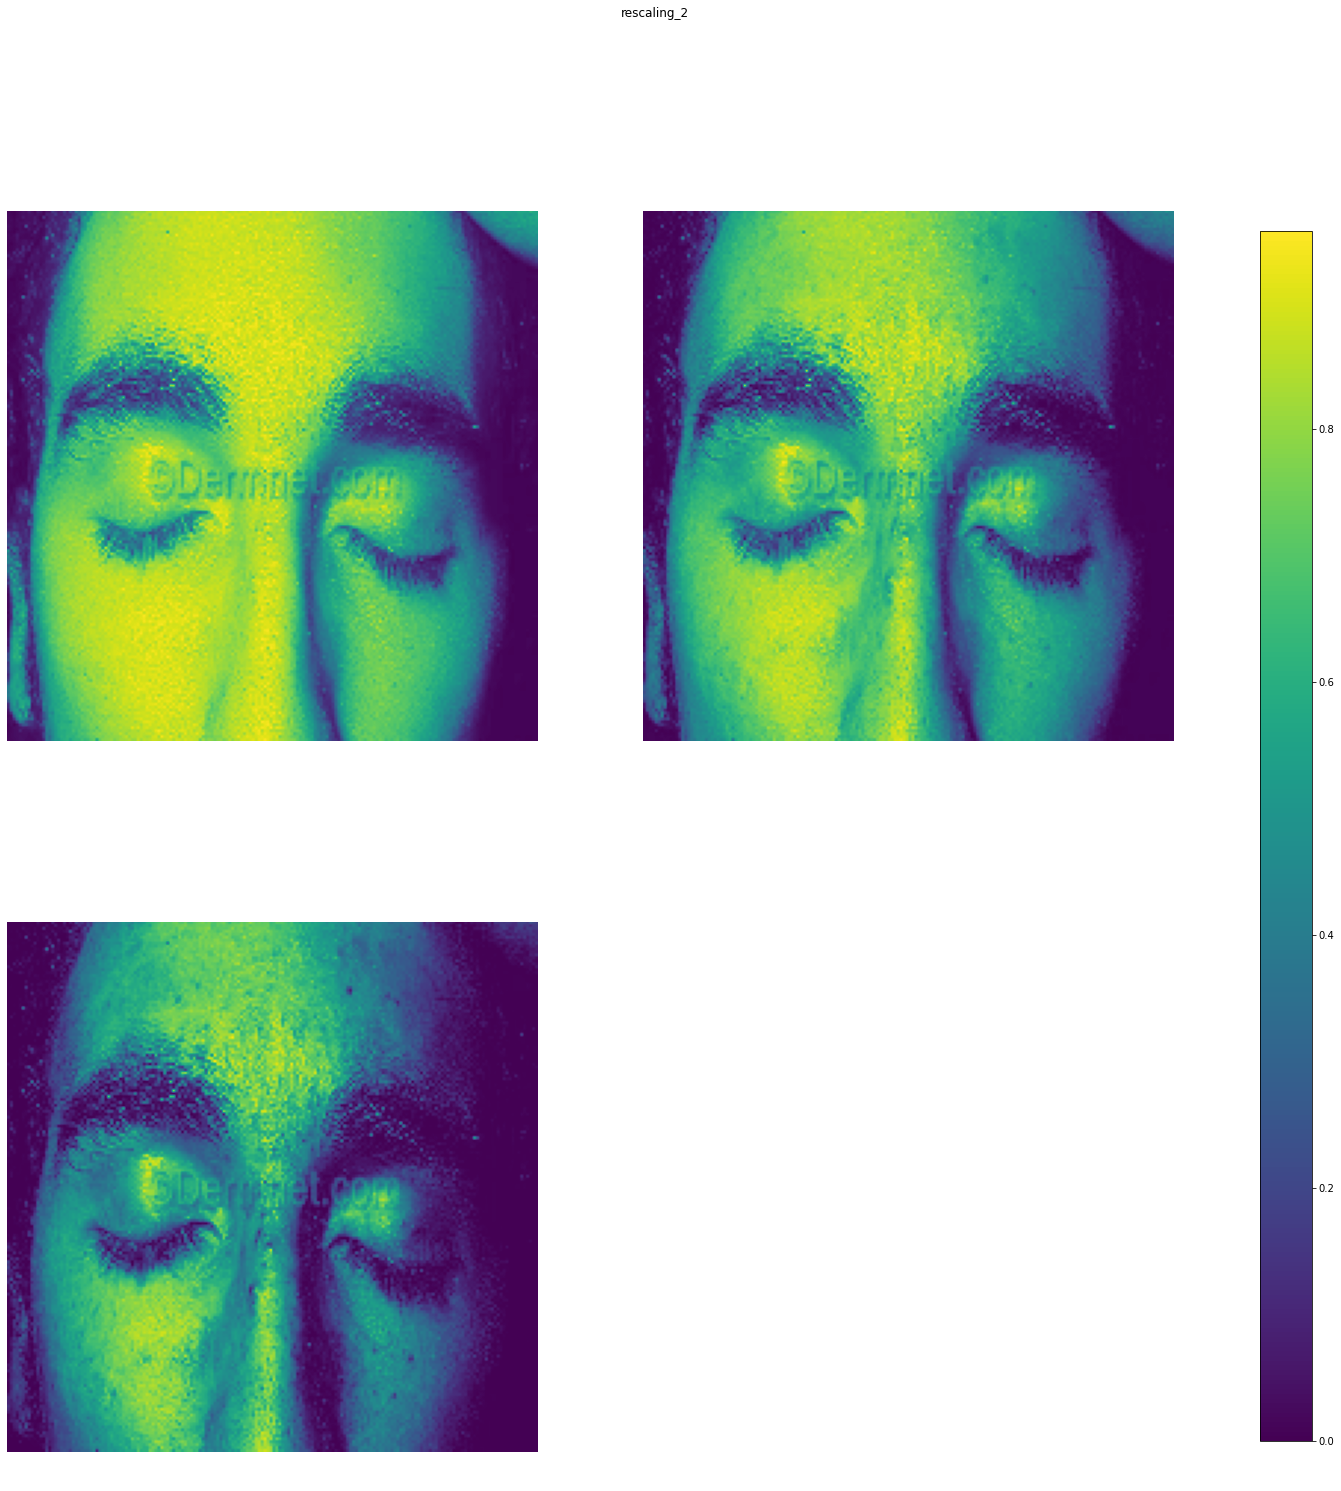

conv2d_4 (1, 180, 180, 16) 


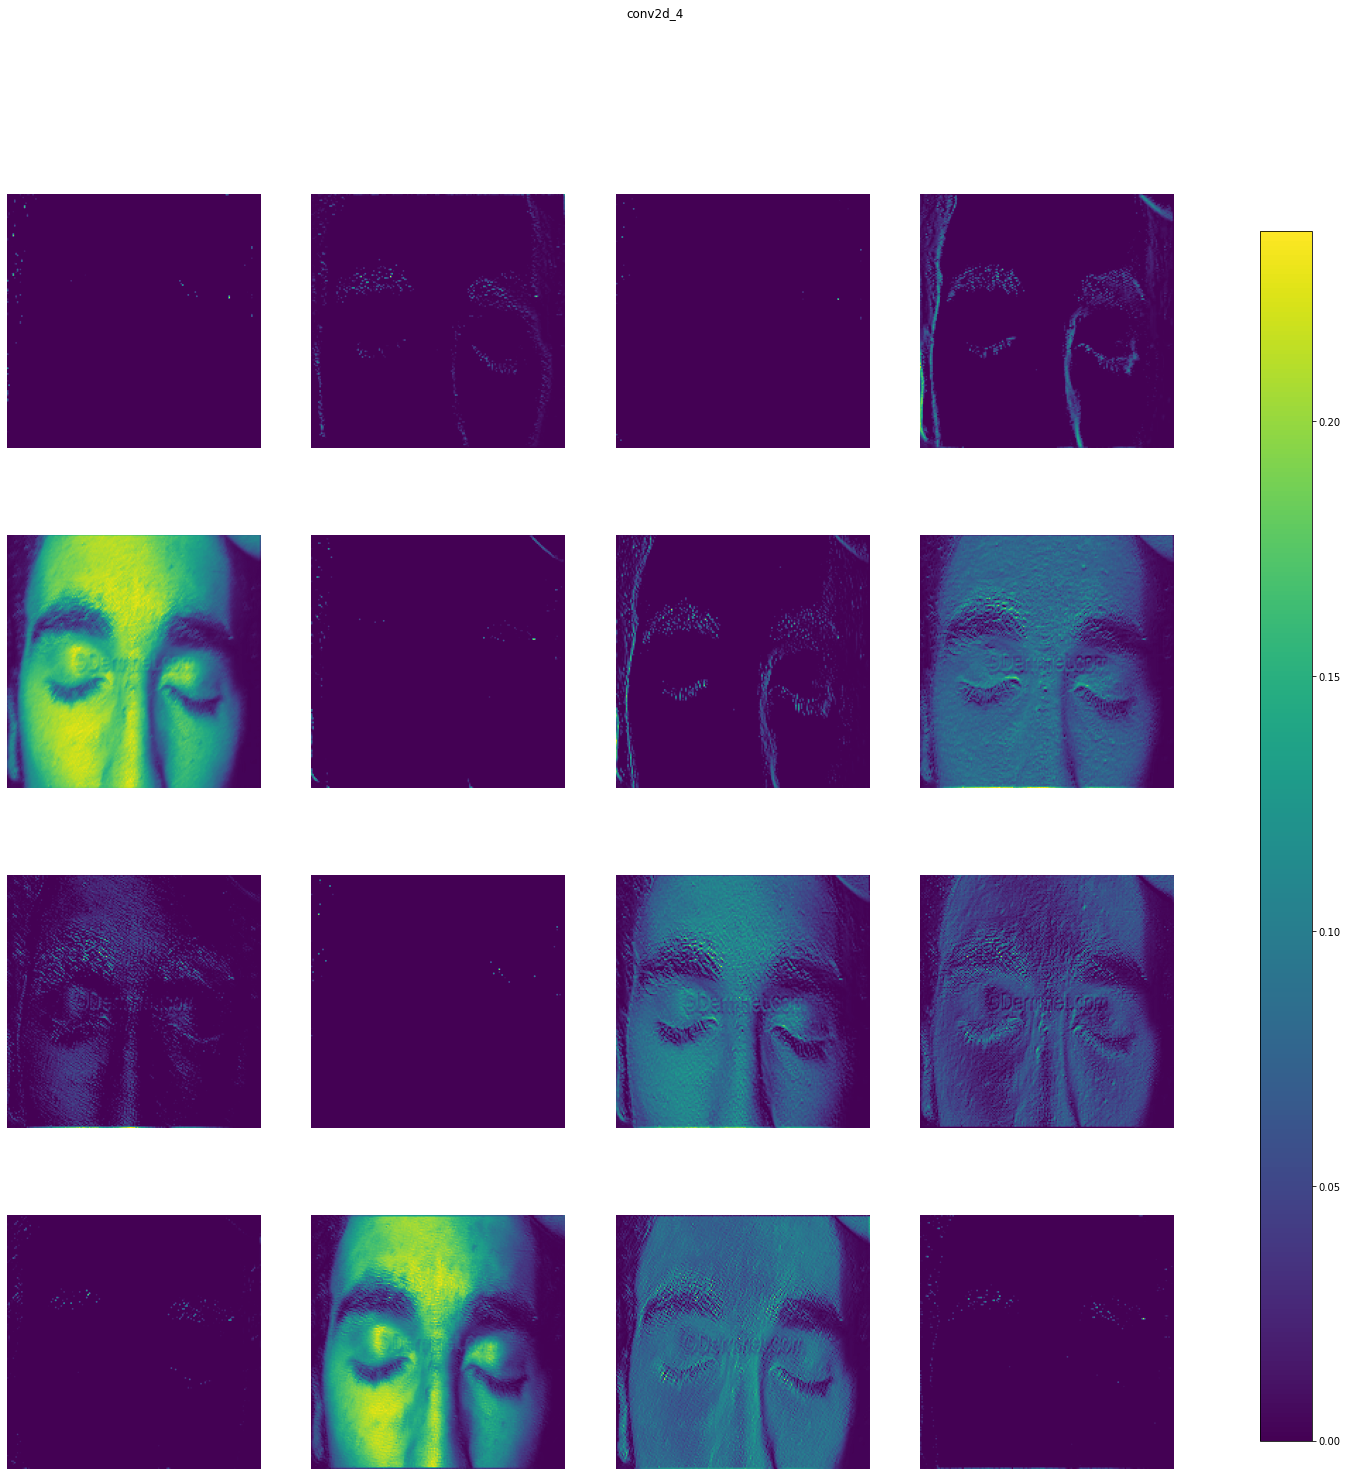

max_pooling2d_4 (1, 90, 90, 16) 


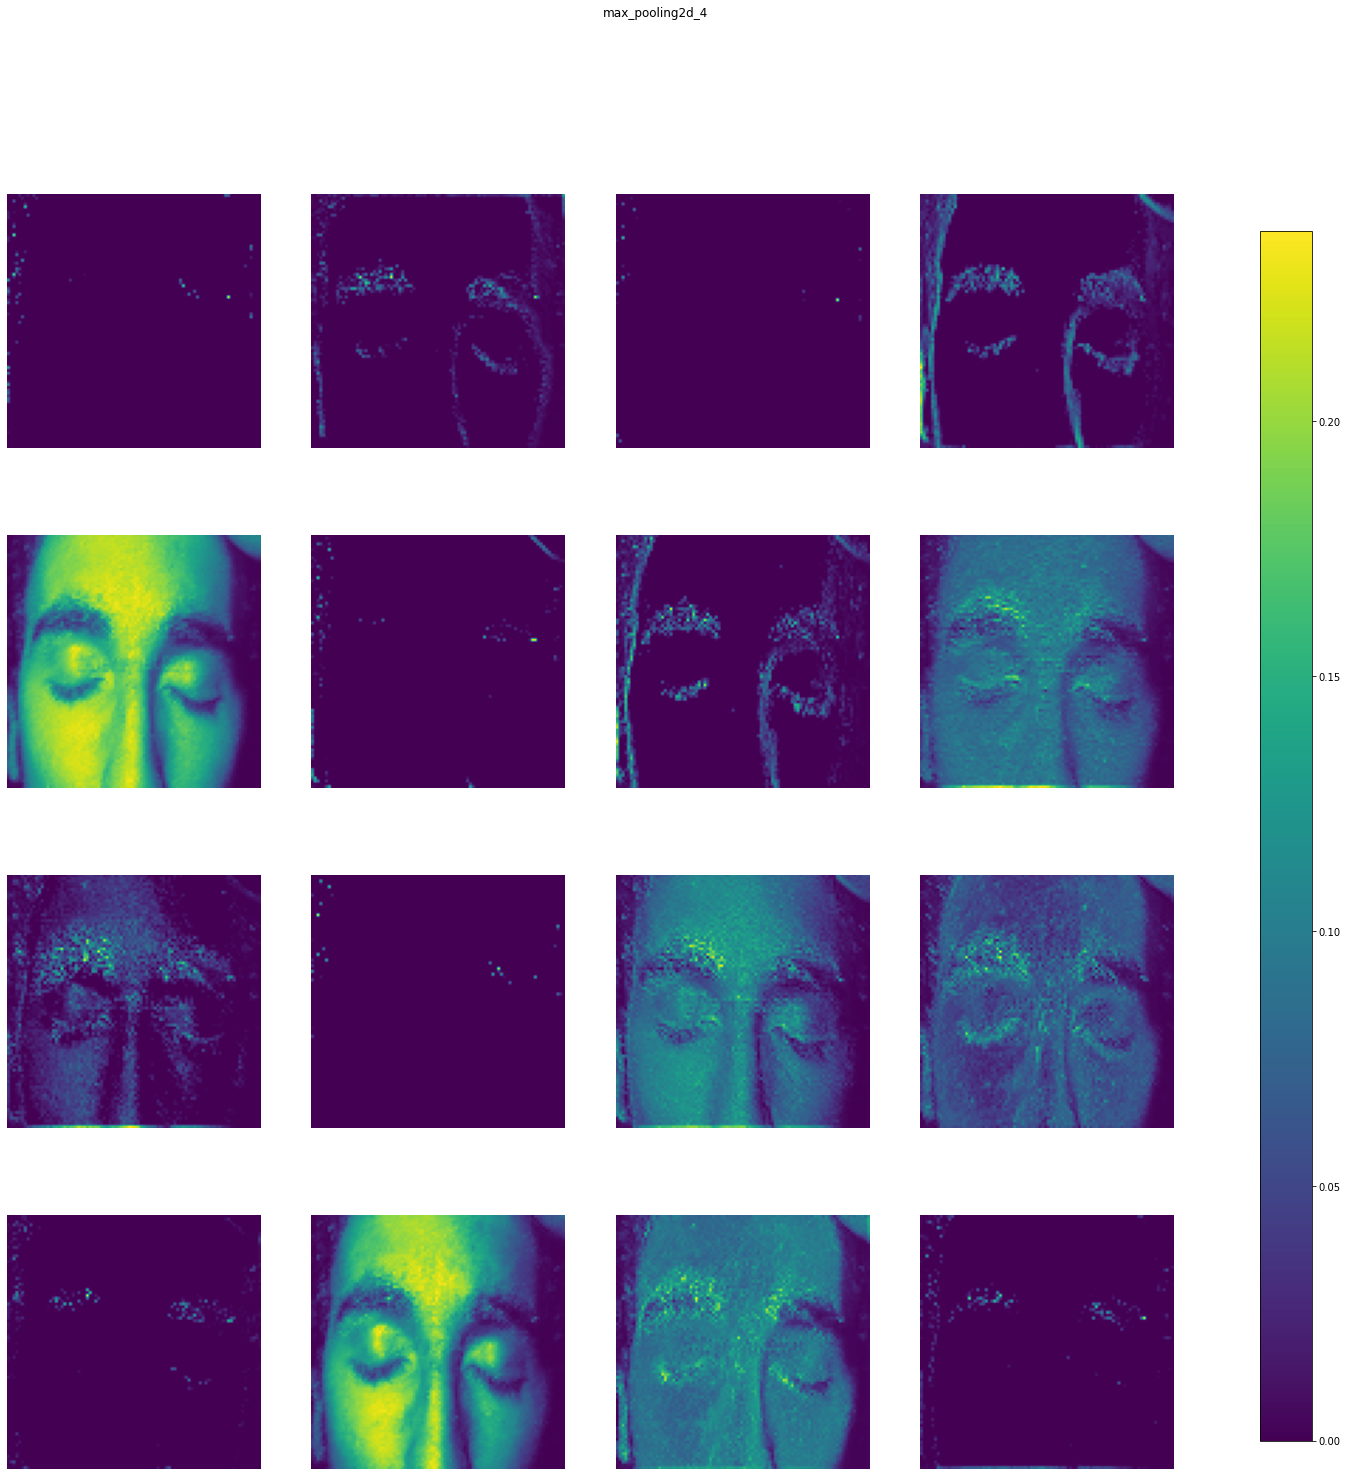

conv2d_5 (1, 90, 90, 32) 


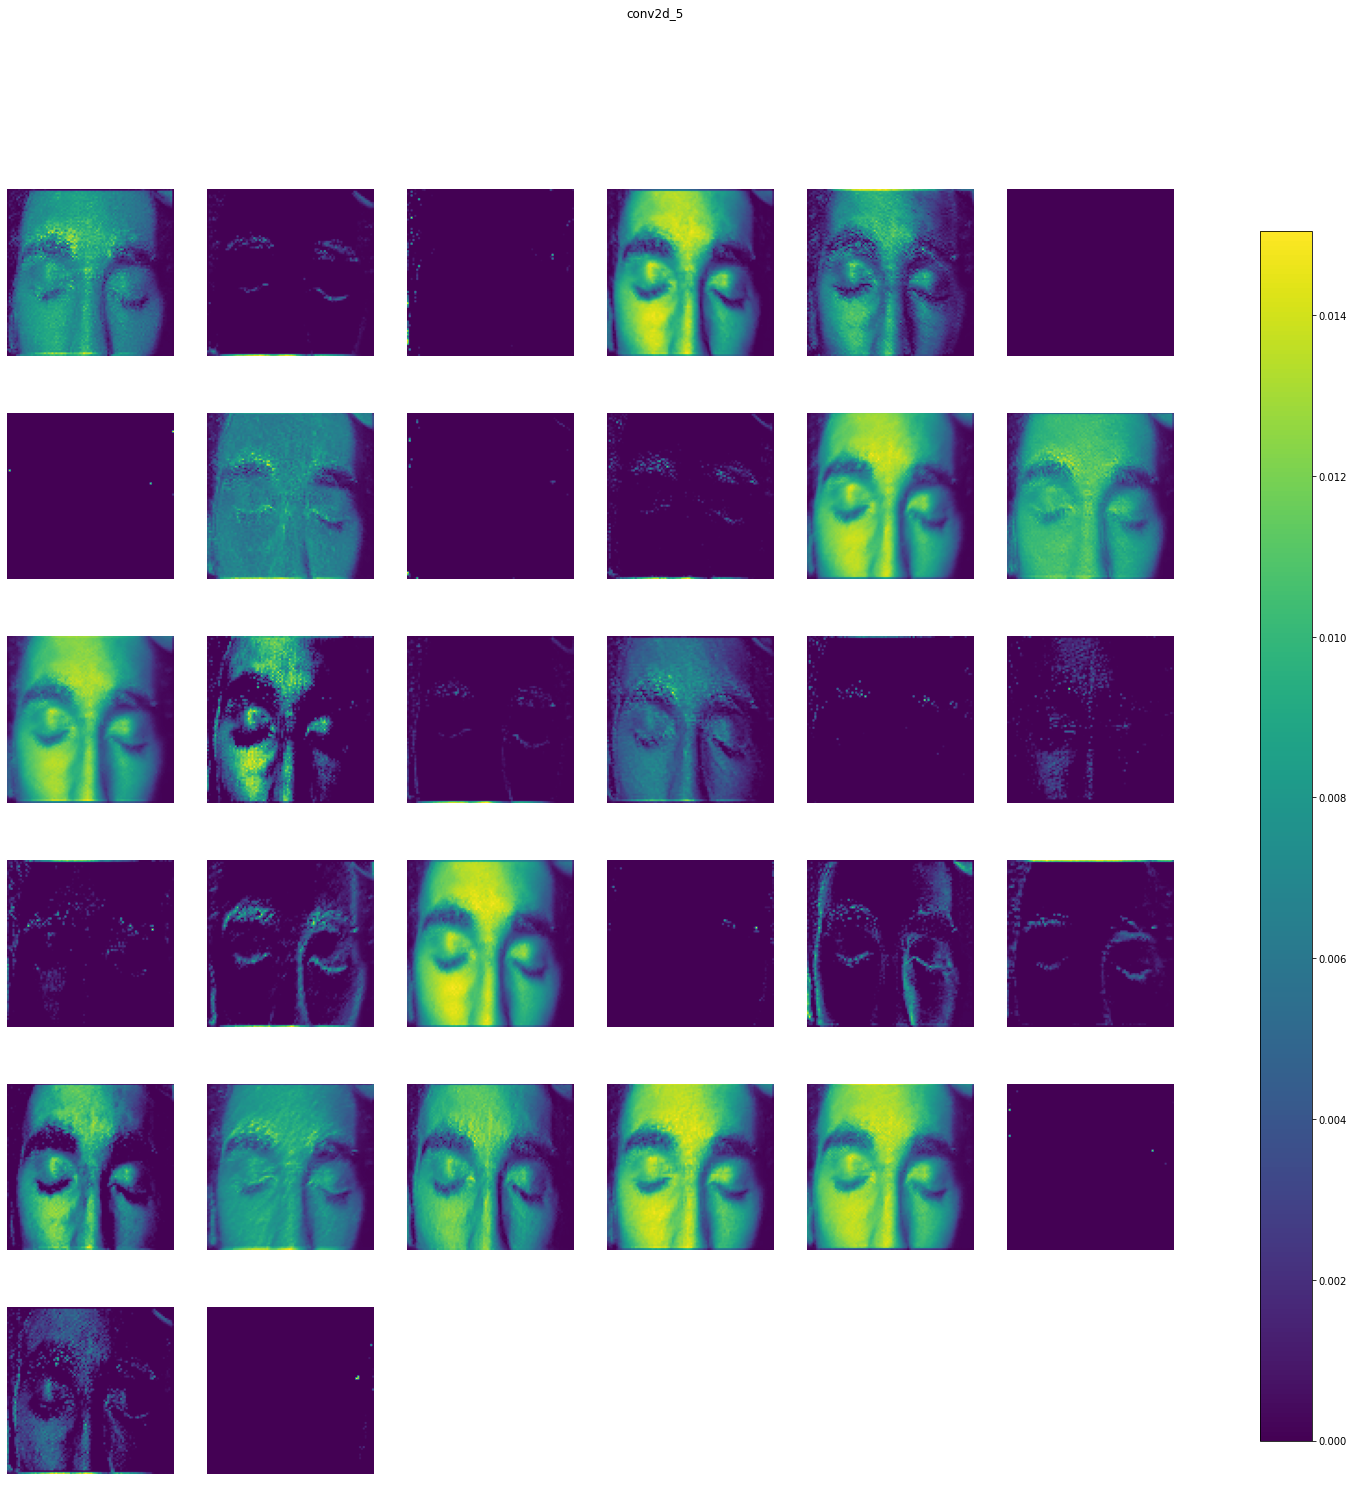

max_pooling2d_5 (1, 45, 45, 32) 


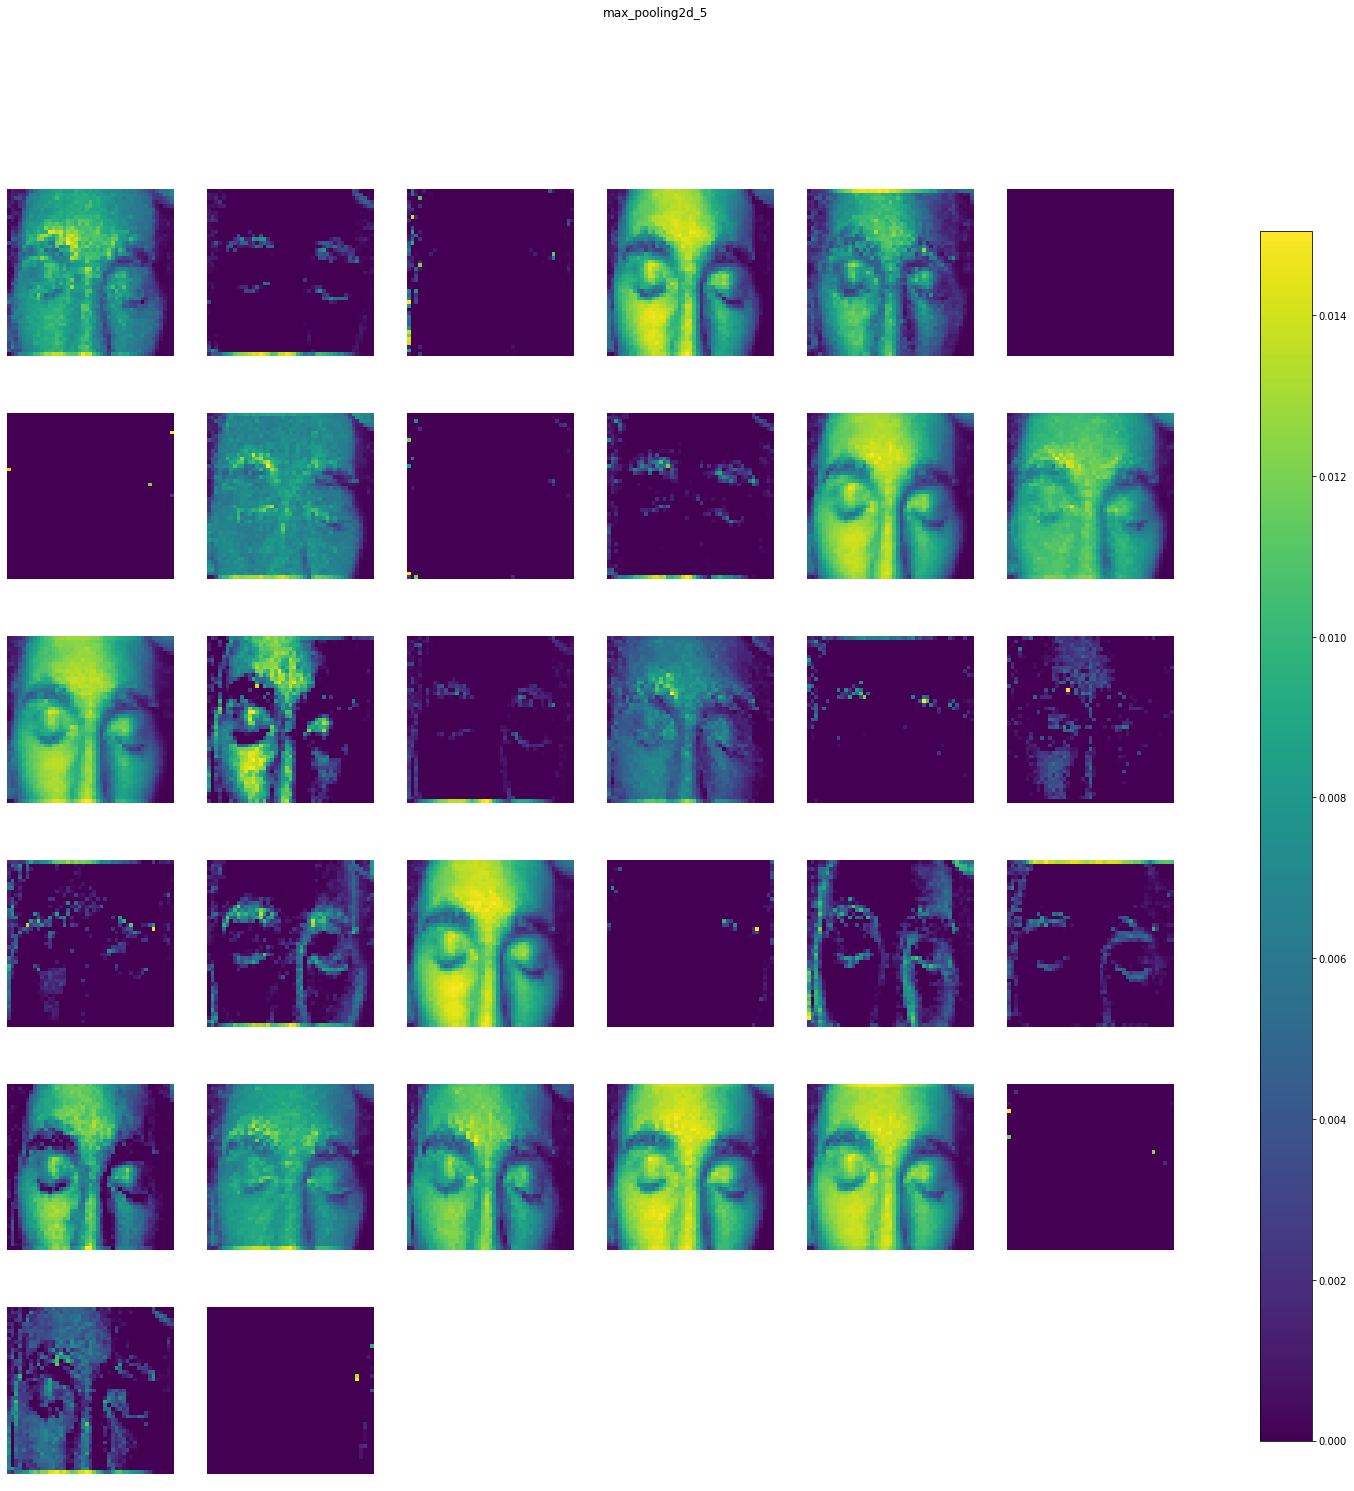

conv2d_6 (1, 45, 45, 64) 


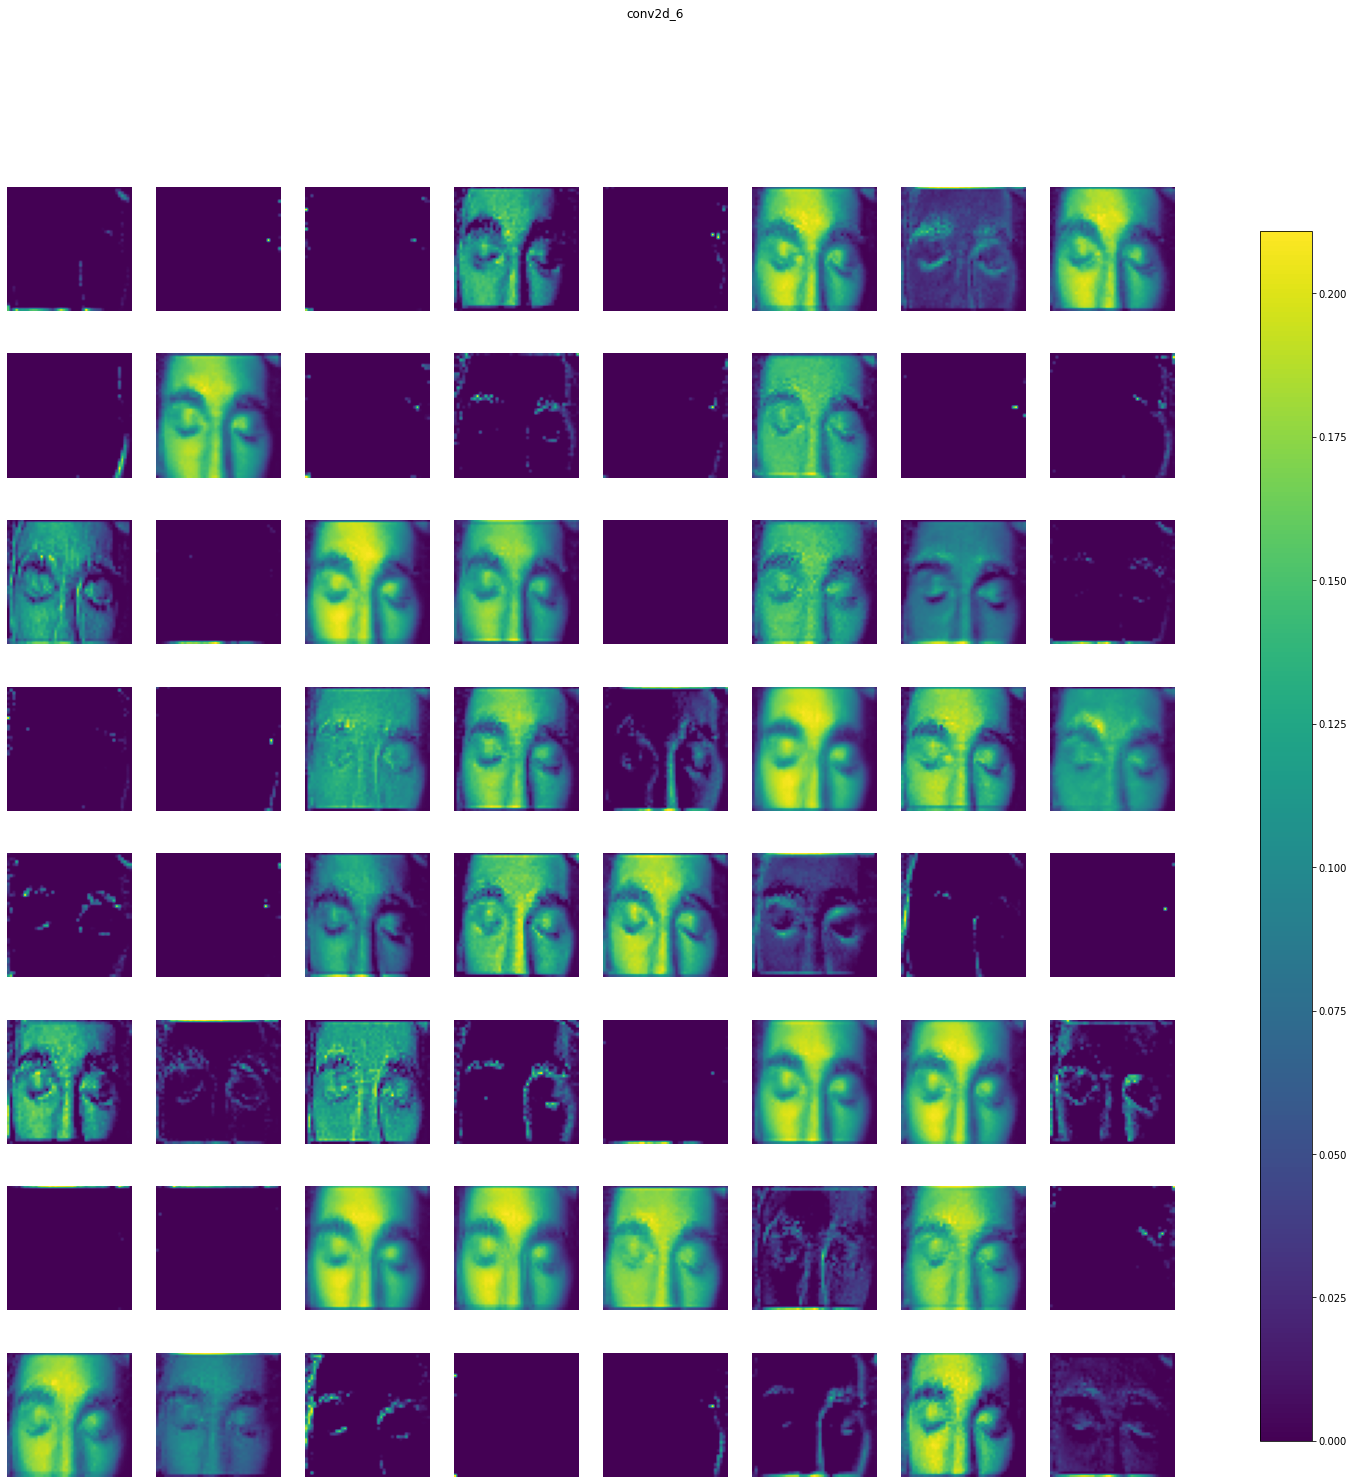

max_pooling2d_6 (1, 22, 22, 64) 


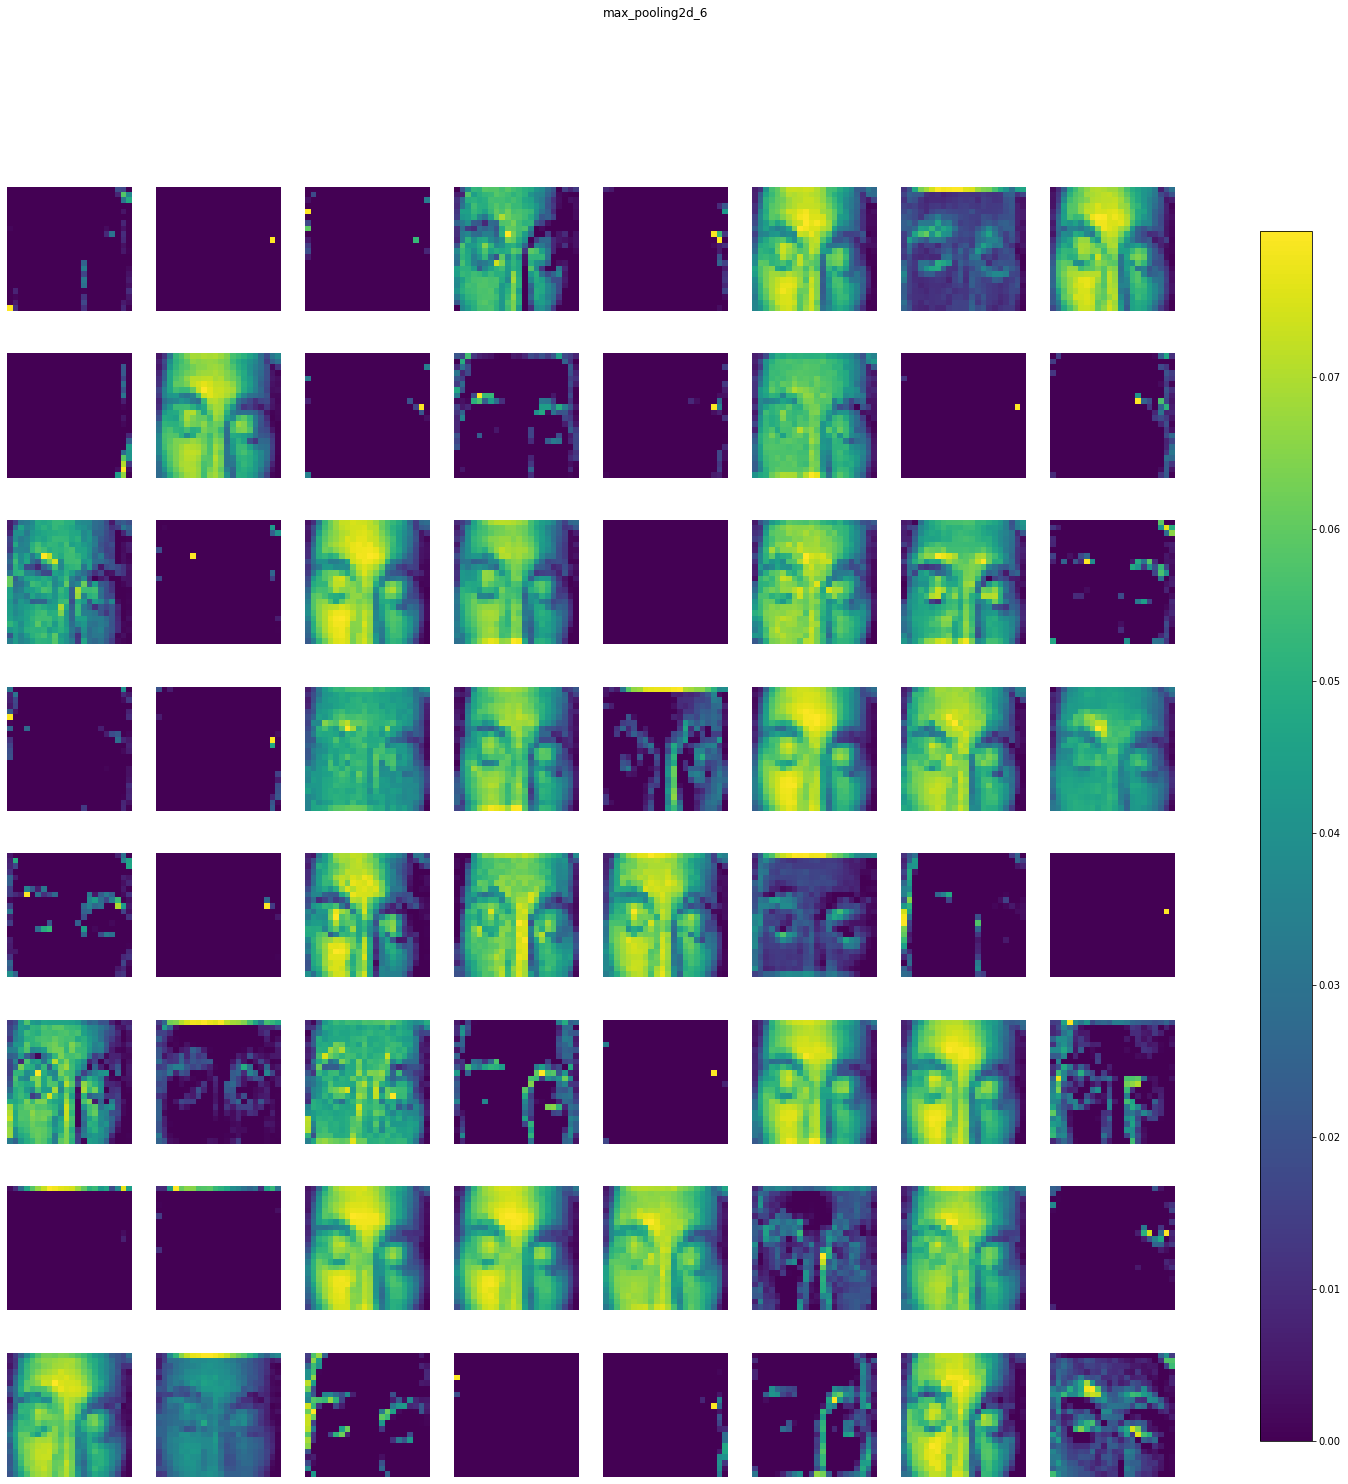

conv2d_7 (1, 22, 22, 128) 


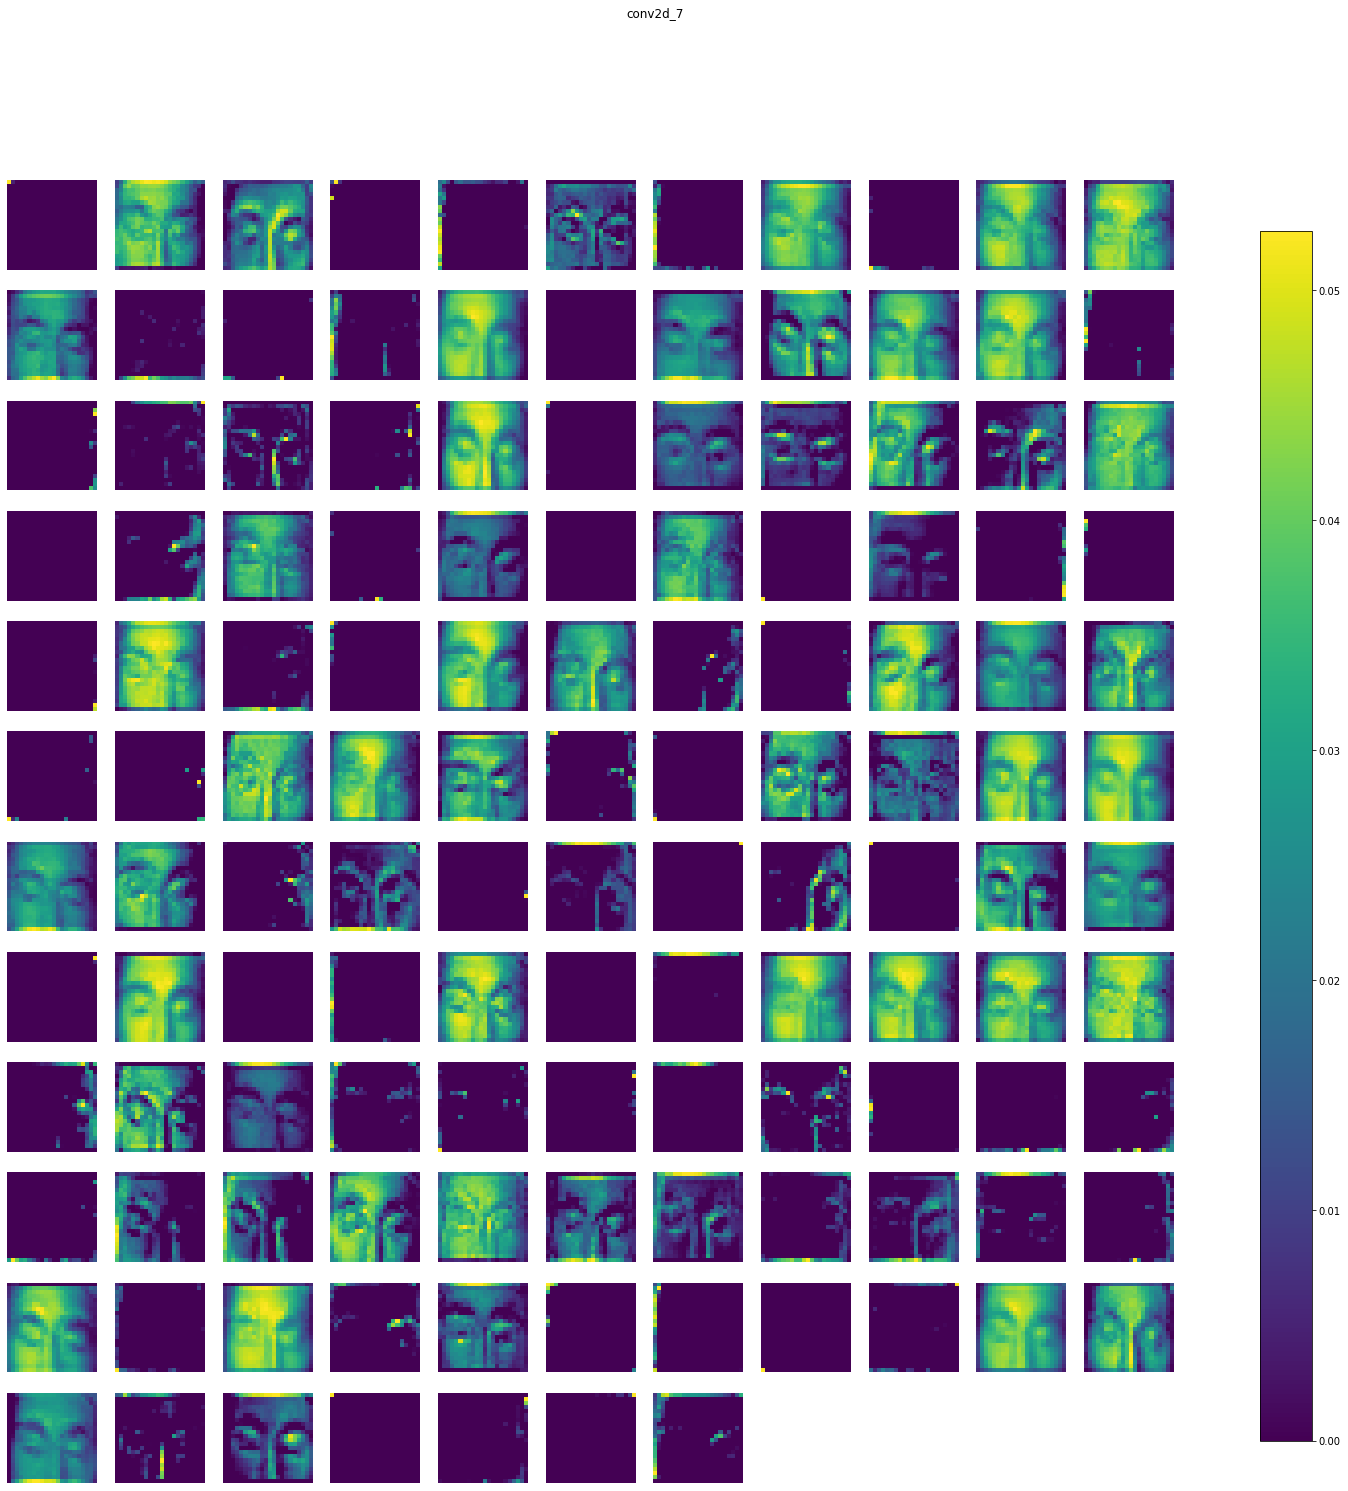

max_pooling2d_7 (1, 11, 11, 128) 


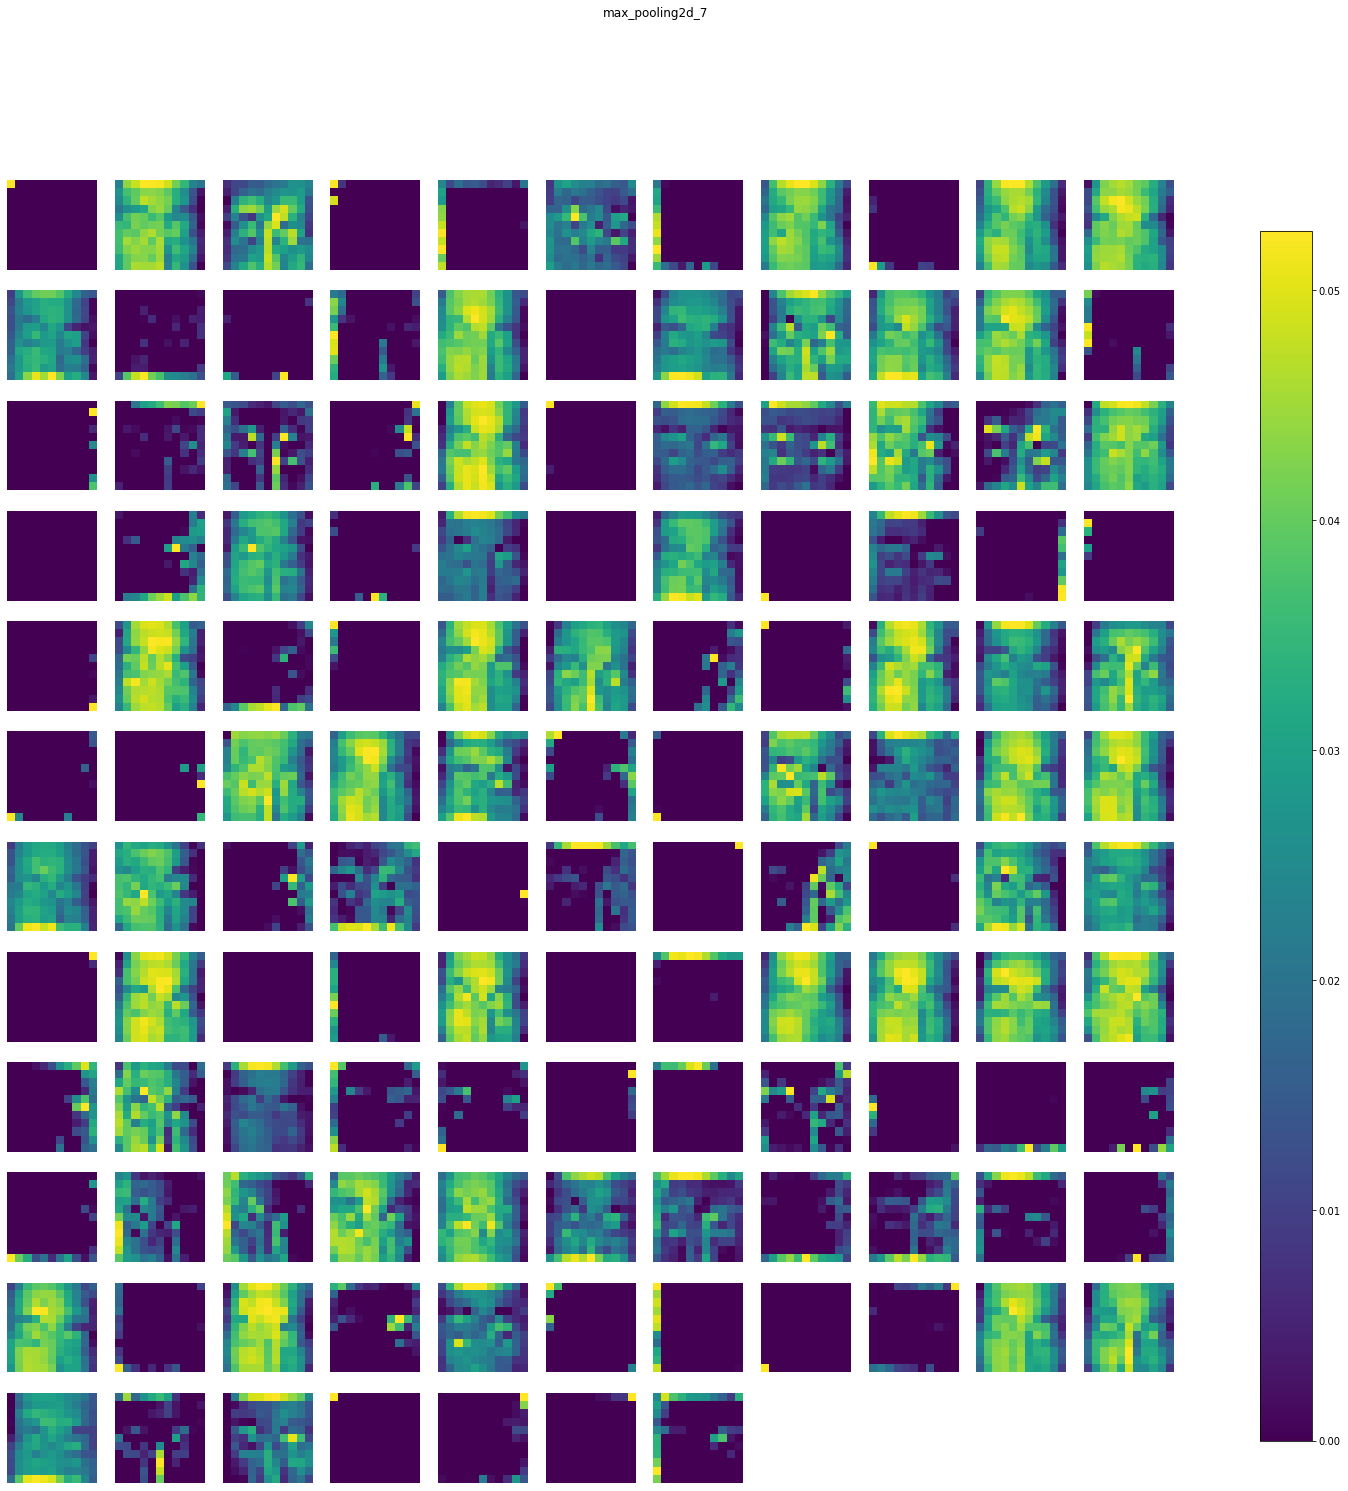

conv2d_8 (1, 11, 11, 256) 


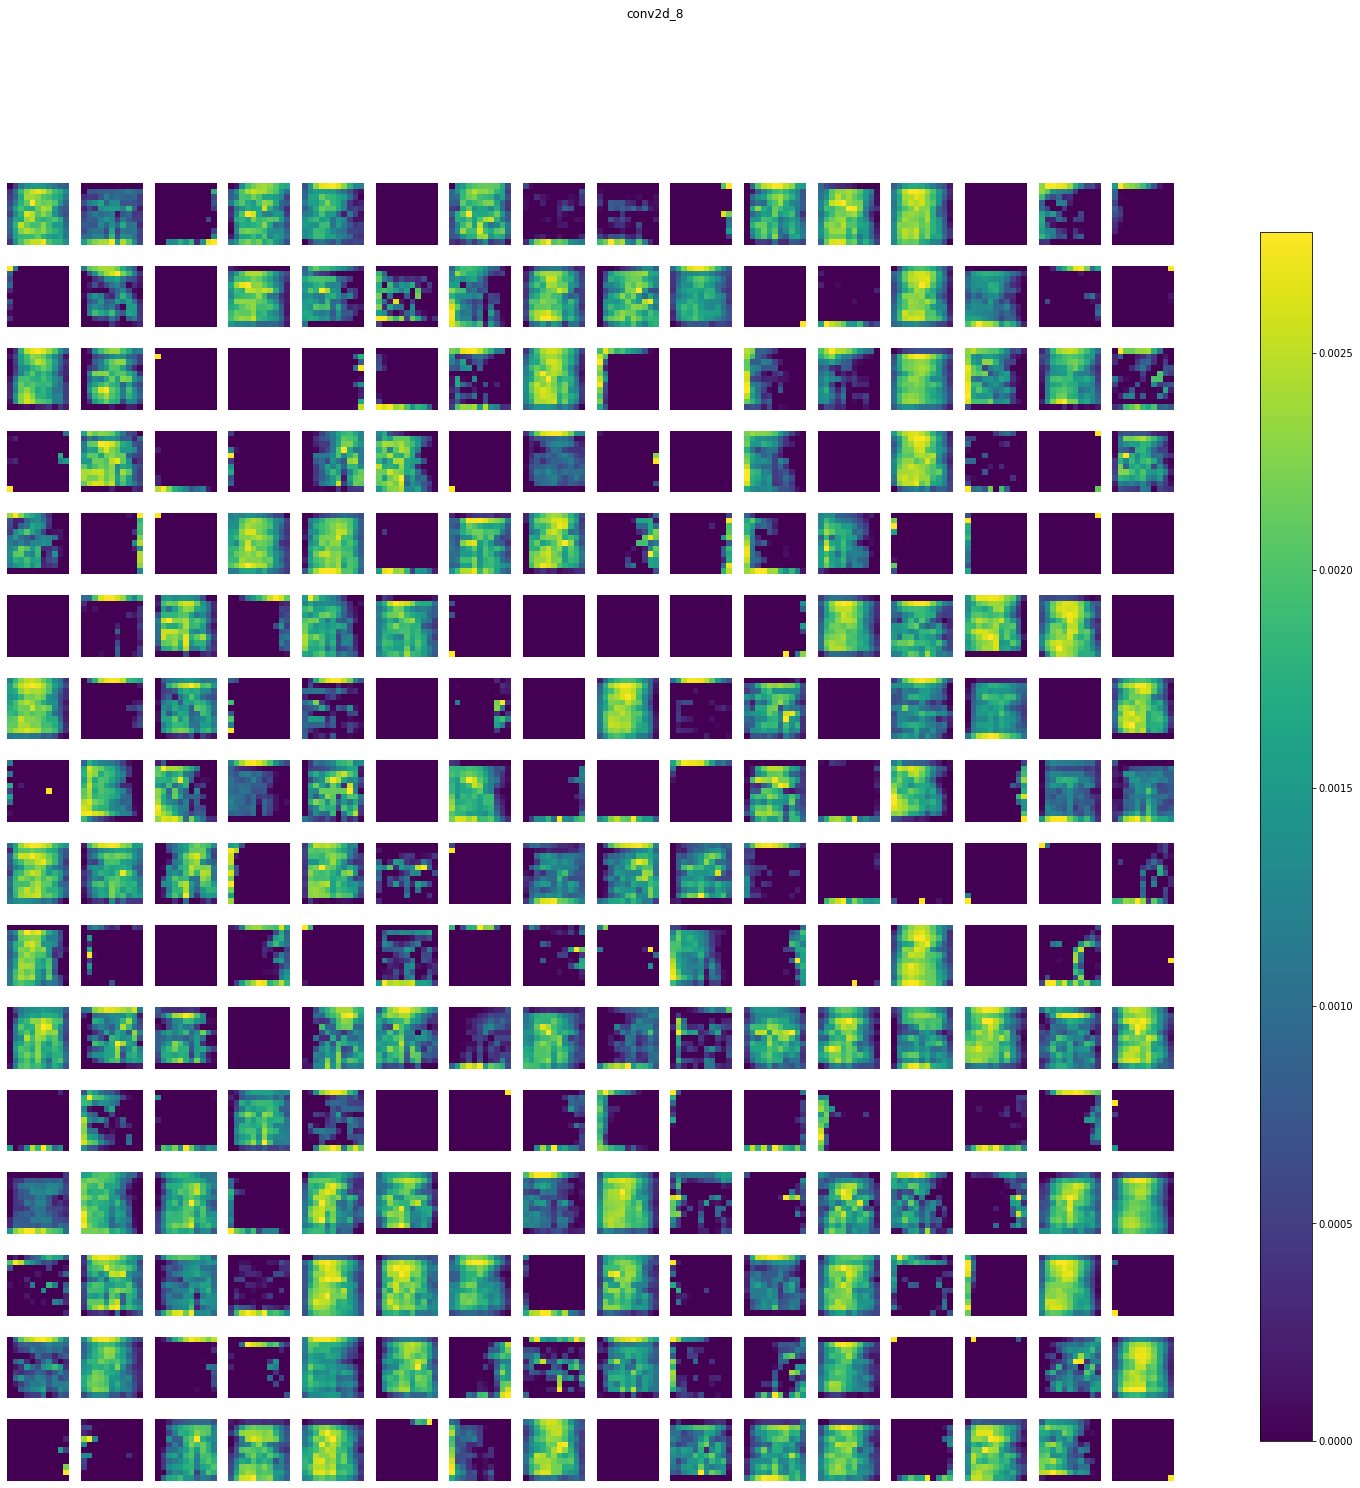

max_pooling2d_8 (1, 5, 5, 256) 


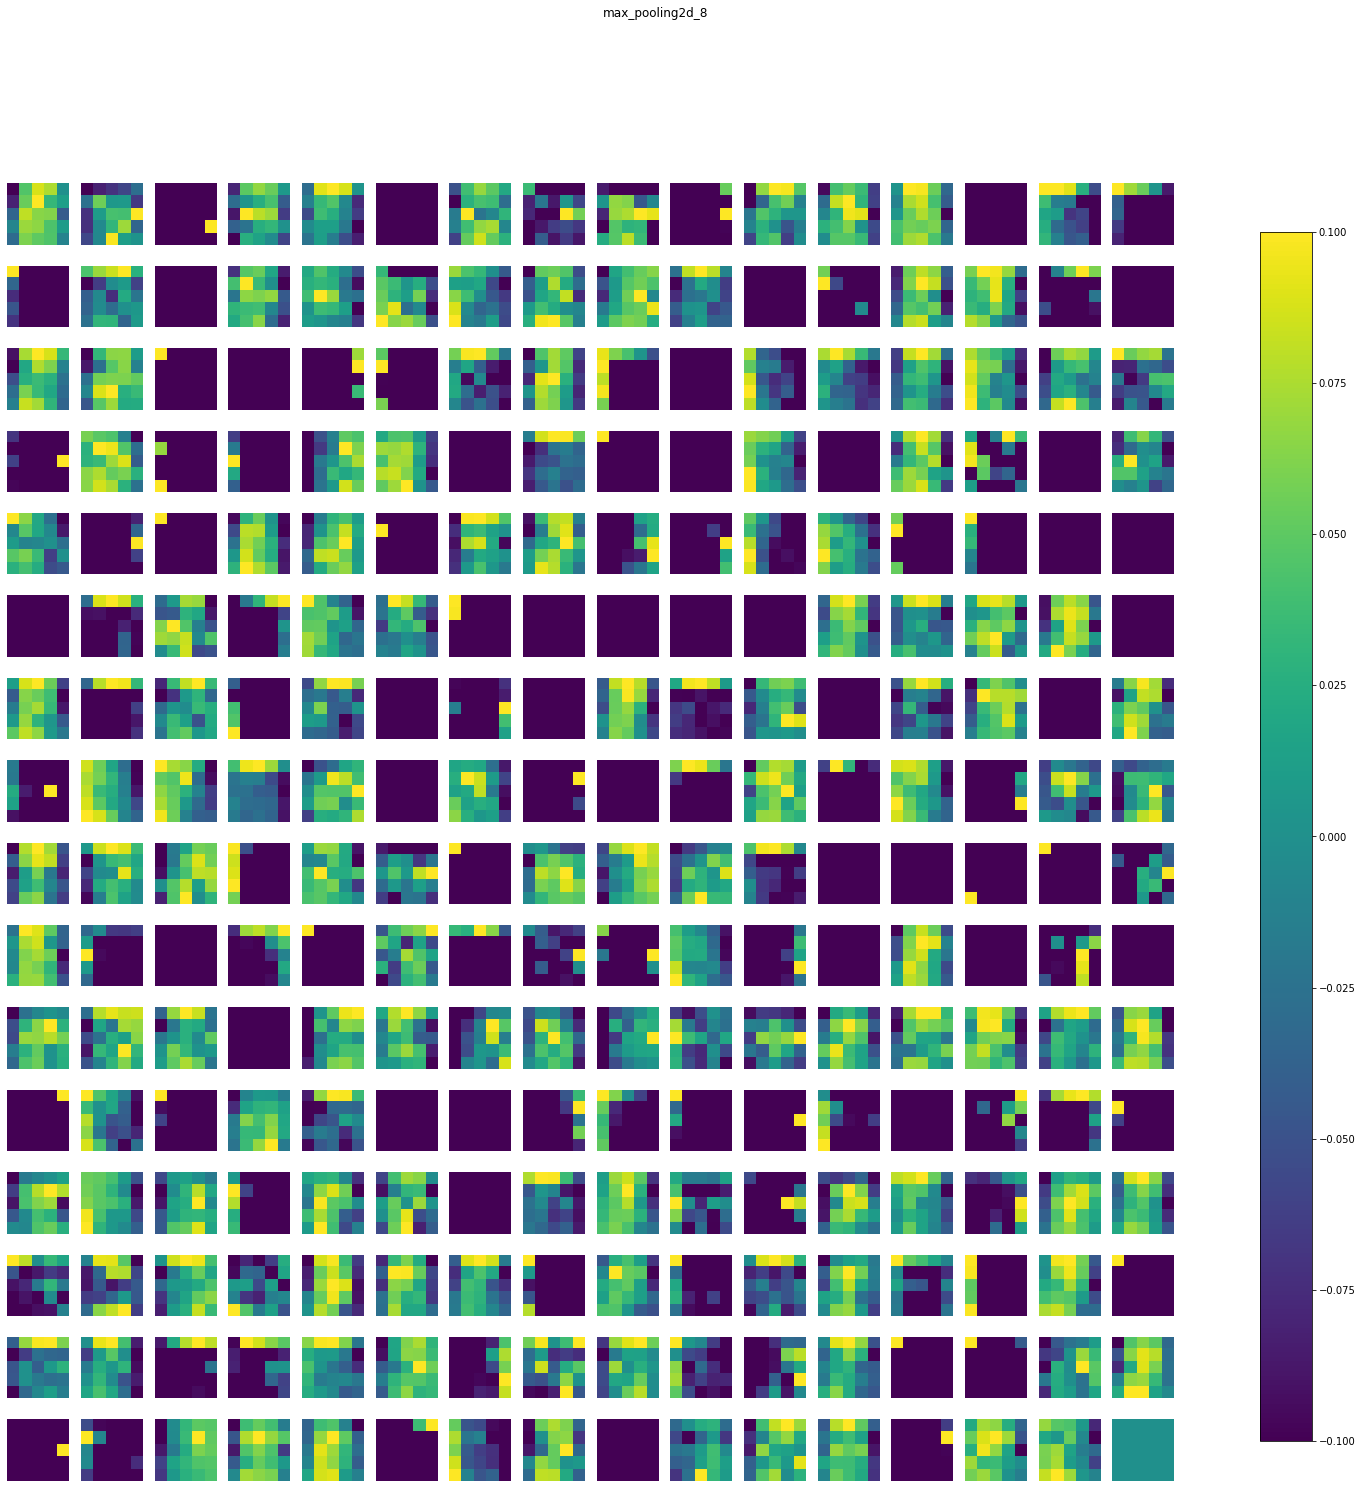

flatten_1 (1, 6400) 


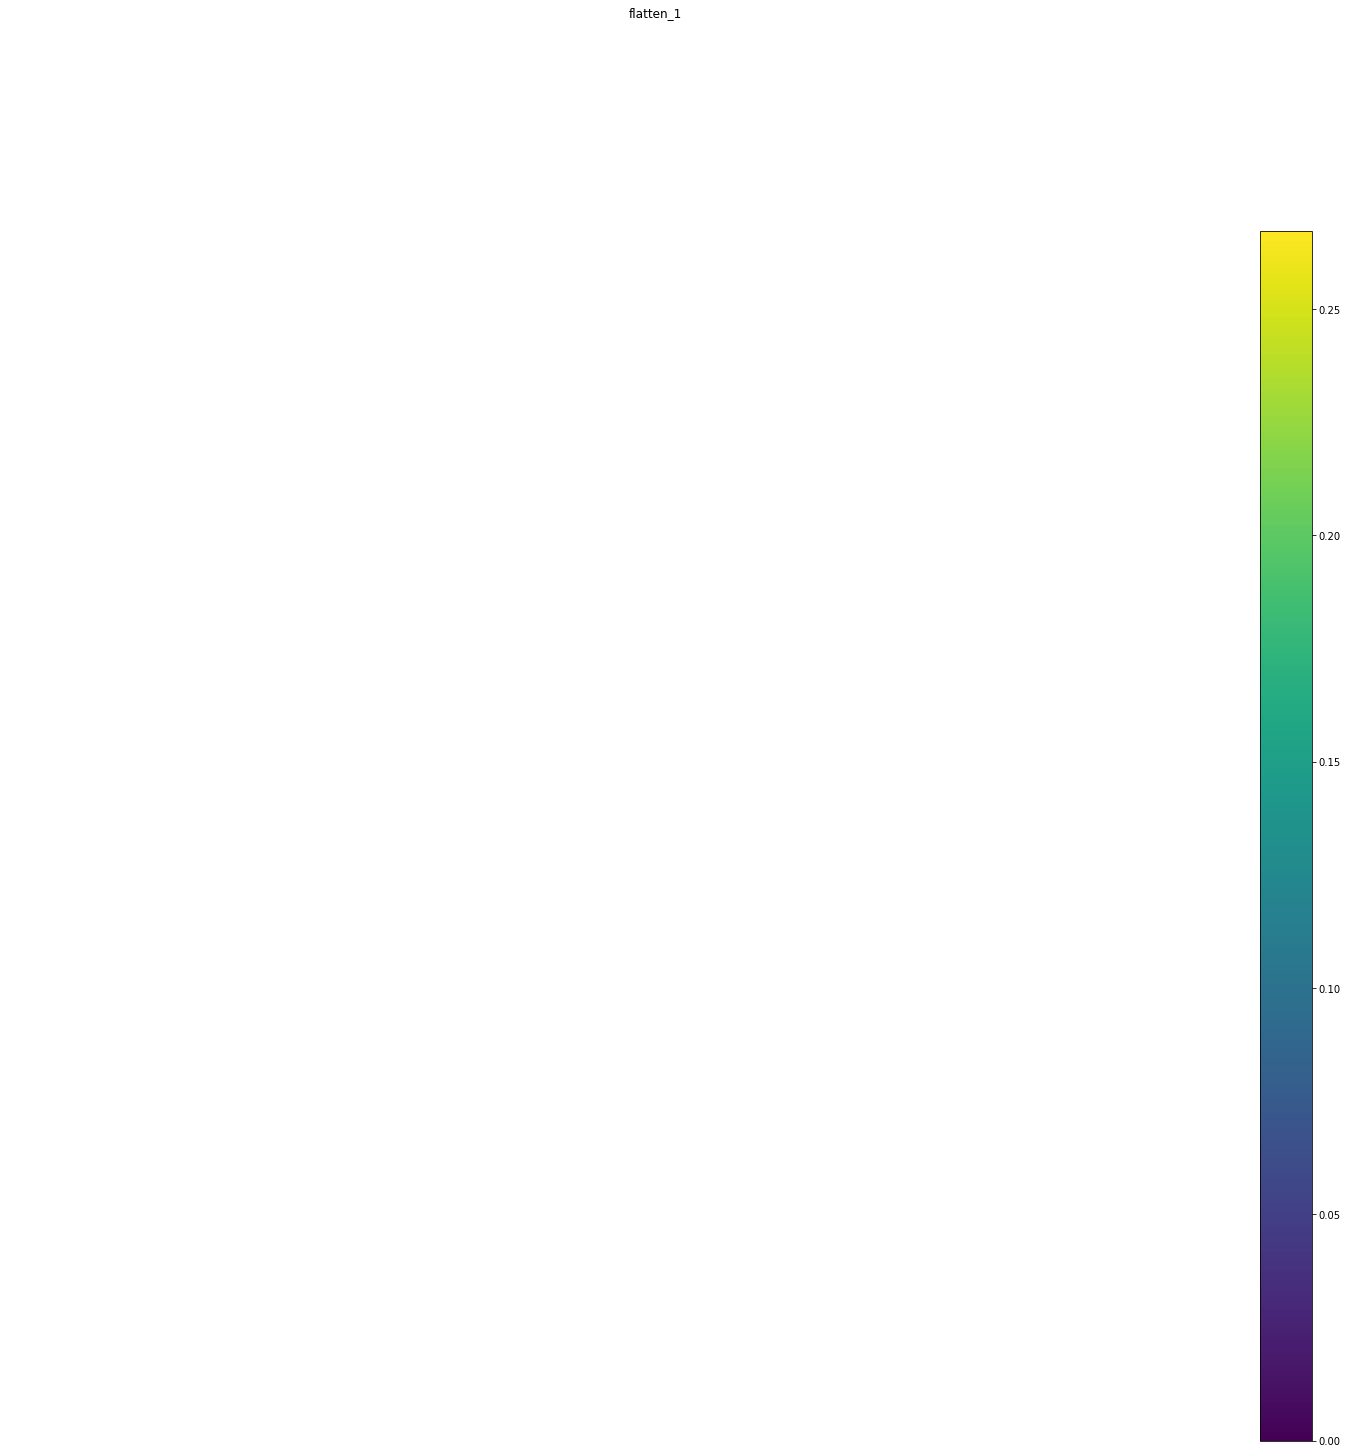

dropout_1 (1, 6400) 


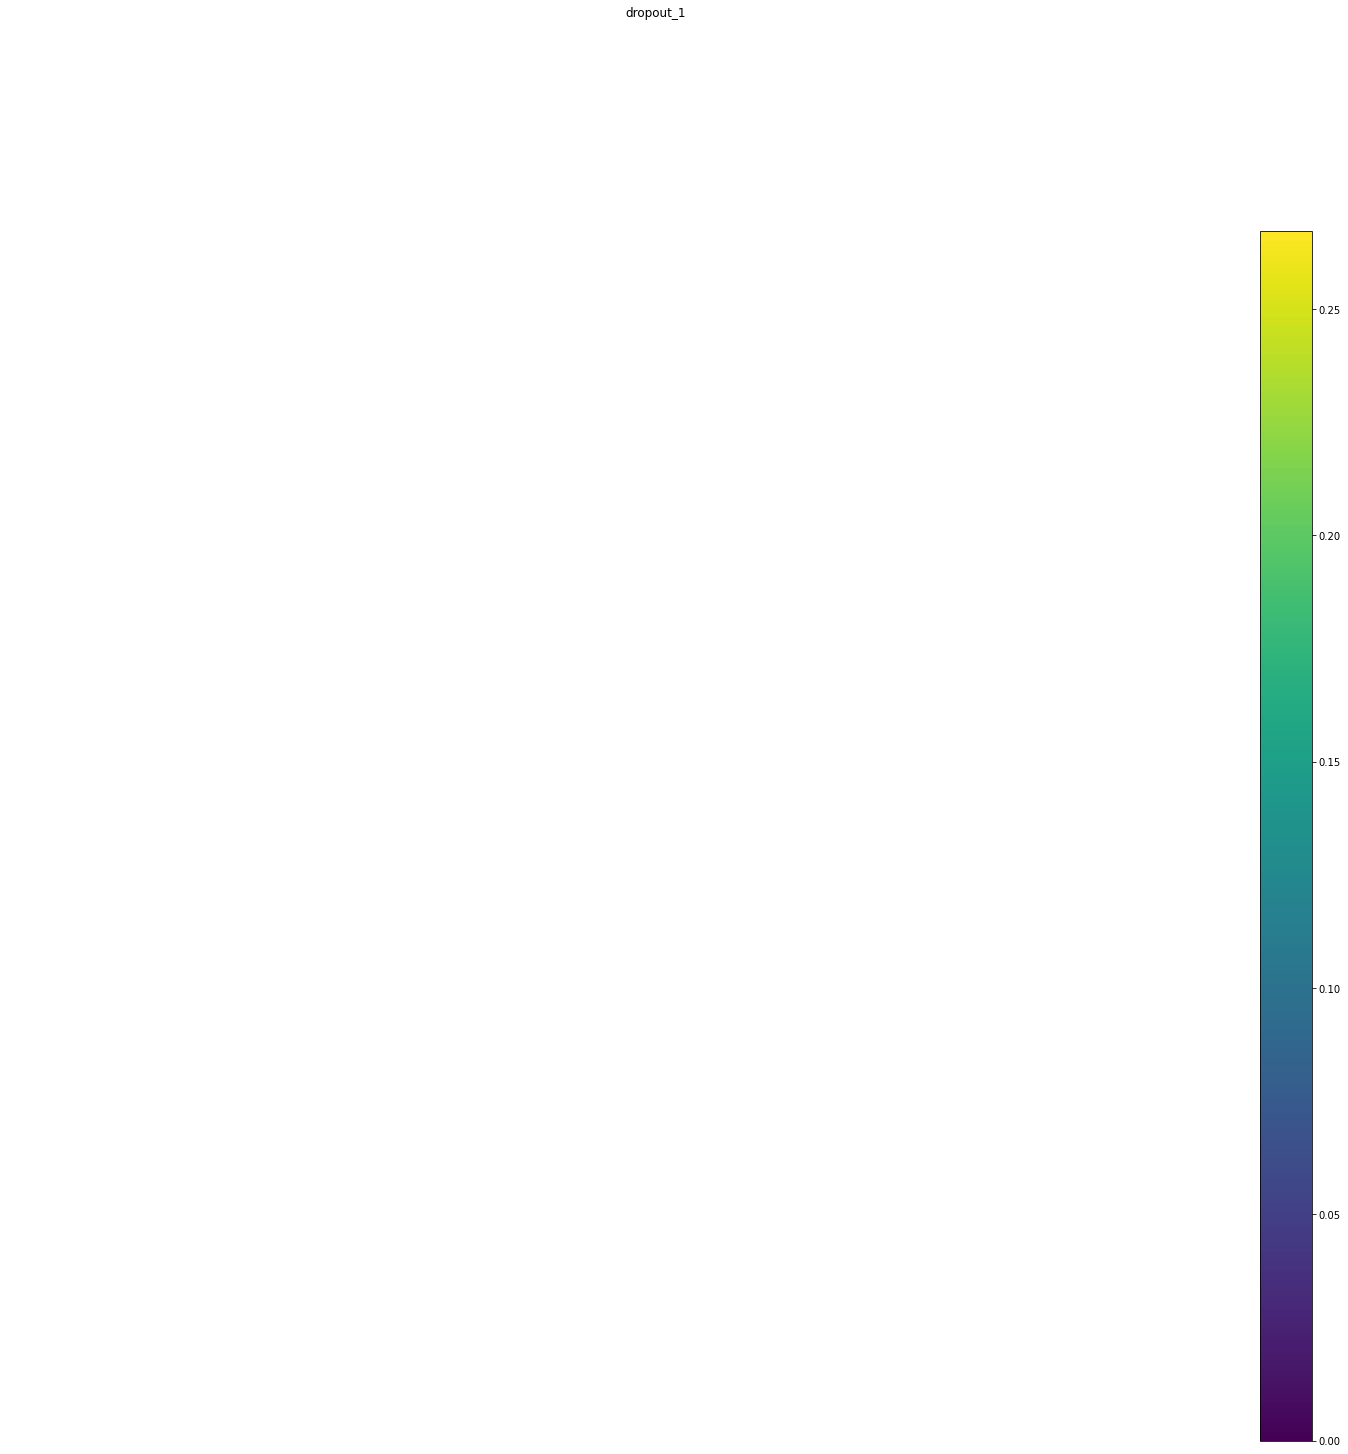

dense_2 (1, 256) 


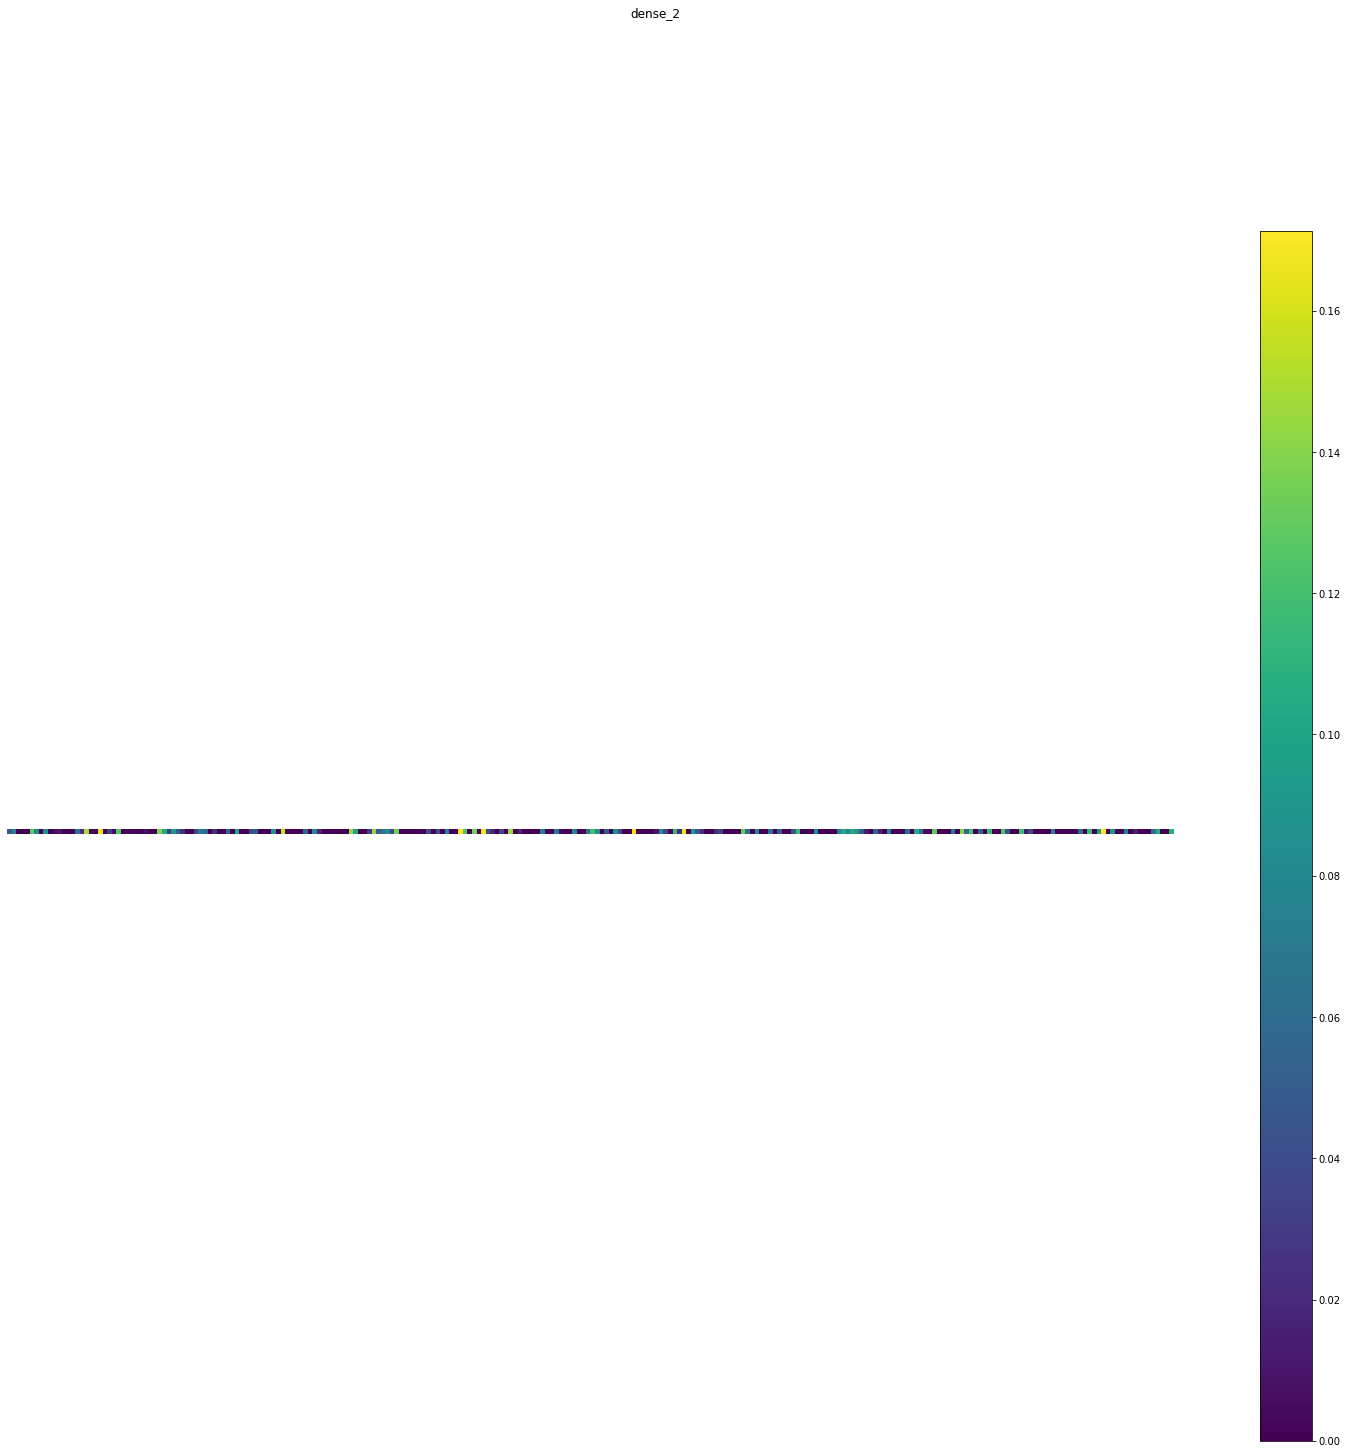

dense_3 (1, 2) 


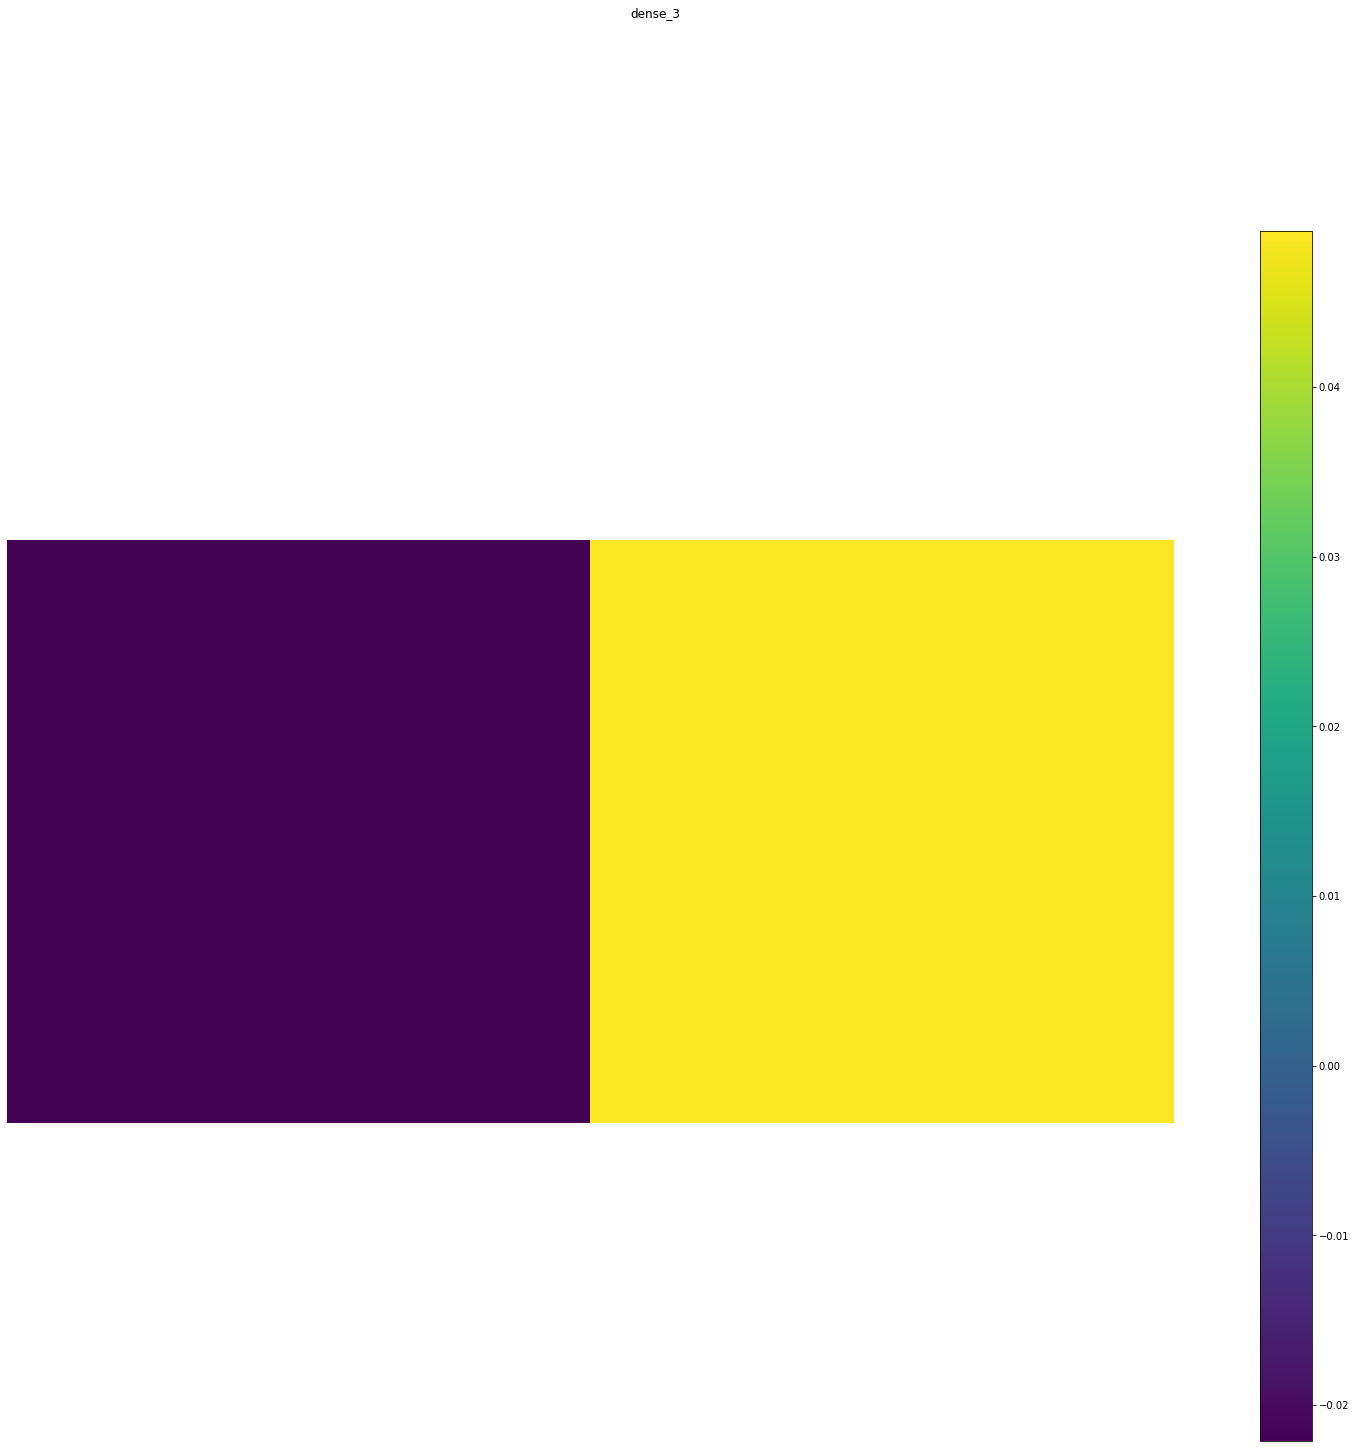

In [20]:
from keract import display_activations
display_activations(activations, cmap=None, save=False, directory='.', data_format='channels_last', fig_size=(24, 24), reshape_1d_layers=False)

In [21]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
629/629 [==============================] - 228s 361ms/step - loss: 0.6787 - accuracy: 0.5910 - val_loss: 0.6241 - val_accuracy: 0.6675
Epoch 2/30
629/629 [==============================] - 219s 348ms/step - loss: 0.6577 - accuracy: 0.6303 - val_loss: 0.6379 - val_accuracy: 0.6340
Epoch 3/30
629/629 [==============================] - 219s 349ms/step - loss: 0.6389 - accuracy: 0.6431 - val_loss: 0.6246 - val_accuracy: 0.6595
Epoch 4/30
629/629 [==============================] - 217s 345ms/step - loss: 0.6230 - accuracy: 0.6568 - val_loss: 0.6072 - val_accuracy: 0.6794
Epoch 5/30
629/629 [==============================] - 217s 345ms/step - loss: 0.6008 - accuracy: 0.6856 - val_loss: 0.5829 - val_accuracy: 0.7112
Epoch 6/30
629/629 [==============================] - 216s 344ms/step - loss: 0.5828 - accuracy: 0.6983 - val_loss: 0.5946 - val_accuracy: 0.7120
Epoch 7/30
629/629 [==============================] - 217s 346ms/step - loss: 0.5482 - accuracy: 0.7294 - val_loss: 0.5578 -

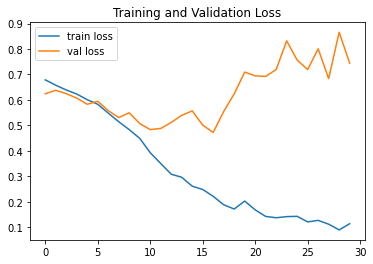

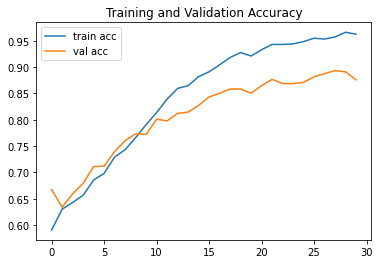

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
import matplotlib.pyplot as plt
plt.title('Training and Validation Loss')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.title('Training and Validation Accuracy')
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [23]:
from tensorflow.keras.models import load_model

model.save('model_ecz_pso.h5')

In [24]:
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model_ecz_pso.h5')

In [25]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img('/content/drive/MyDrive/model/data/test/psoriasis/Psoriasis-Hand-5.jpg', target_size = (180,180))

test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = model.predict(test_image)




if result[0][0]>result[0][1]:
  prediction = 'eczema'

else:
  prediction = 'psoriasis'


print(prediction)

psoriasis
